In [1]:
import tensorflow as tf
a = tf.constant([1.0, 2.0],name="a")
b = tf.constant([2.0, 3.0],name="b")
result = a+b

D:\Anaconda3\envs\crawler\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Anaconda3\envs\crawler\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Anaconda3\envs\crawler\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Anaconda3\envs\crawler\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: P

In [2]:
result

<tf.Tensor 'add:0' shape=(2,) dtype=float32>

In [3]:
print(a.graph is tf.get_default_graph())

True


In [4]:
print(b.graph is tf.get_default_graph())

True


In [5]:
print(result.graph is tf.get_default_graph())

True


## 示意如何再不同计算图上定义和使用变量

In [9]:
g1 = tf.Graph()
with g1.as_default():
    #在计算图g1中定义变量‘v’，并设置初始值为0
    v = tf.get_variable(
        "v", initializer=tf.zeros_initializer()(shape=[1]))
        #initializer=tf.zeros_initializer(shape=[1]))
    
g2 = tf.Graph()
with g2.as_default():
    #在计算图g2中定义变量‘v’，并设置初始值为1
    v = tf.get_variable(
        "v", initializer=tf.ones_initializer()(shape=[1]))
    
#在计算图g1中读取变量“v”的取值
with tf.Session(graph=g1) as sess:
    tf.global_variables_initializer().run()
    with tf.variable_scope("", reuse=True):
        #在计算图g1中，变量“v”的取值应该为0，所以下面这行会输出[0.]
        print(sess.run(tf.get_variable("v")))
        
#在计算图g1中读取变量“v”的取值
with tf.Session(graph=g2) as sess:
    tf.global_variables_initializer().run()
    with tf.variable_scope("", reuse=True):
        #在计算图g1中，变量“v”的取值应该为1，所以下面这行会输出[0.]
        print(sess.run(tf.get_variable("v")))

[0.]
[1.]


In [10]:
tf.Graph.device

<function tensorflow.python.framework.ops.Graph.device(self, device_name_or_function)>

### 在一个计算图中，可以通过集合（collection）来管理不同类别的资源

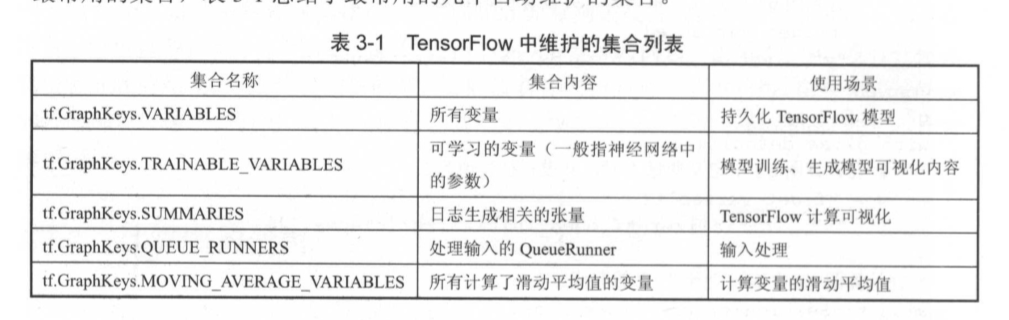

## 张量

零阶张量表示标量-scalar,也就是1个数
第一阶张量为向量-vector，一维数组
第n阶张量可以理解为一个n维数组

In [13]:
import tensorflow as tf
a = tf.constant([1.0 , 2.0], name="a")
b = tf.constant([2.0, 3.0],name="b")
result = tf.add(a, b, name="add")
print(result)

Tensor("add_1:0", shape=(2,), dtype=float32)


In [14]:
print(a)

Tensor("a_1:0", shape=(2,), dtype=float32)
